# Chapter 3: Small World Graphs 

# Think Complexity Second Edition by Alan Downey

Working on connectivity coefficient and effective path length

In [71]:
import networkx as nx
import plotly_express as px

COLORS = px.colors.qualitative.T10
COLORS

['#4c78a8',
 '#f58518',
 '#e45756',
 '#72b7b2',
 '#54a24b',
 '#eeca3b',
 '#b279a2',
 '#ff9da6',
 '#9d755d',
 '#bab0ac']

In [72]:
nodes = range(5)
halfk = 3
k = 6
n = len(nodes)

for i, u in enumerate(nodes):
    for j in range(i + 1, i + halfk + 1):
        print(u, j, j % n)

0 1 1
0 2 2
0 3 3
1 2 2
1 3 3
1 4 4
2 3 3
2 4 4
2 5 0
3 4 4
3 5 0
3 6 1
4 5 0
4 6 1
4 7 2


In [73]:
import numpy as np

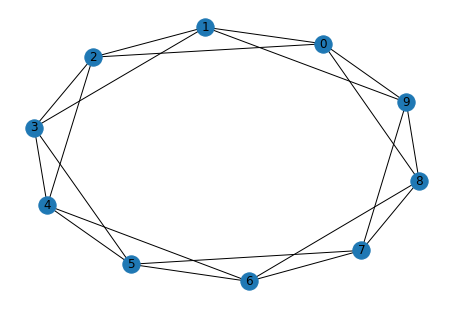

In [74]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v
            
            
def make_ring_lattice(n , k):
    nodes = range(n)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    edges = adjacent_edges(nodes, k // 2)
    G.add_edges_from(edges)
    return G

Gr = make_ring_lattice(10, 4)
nx.draw(Gr, with_labels=True)

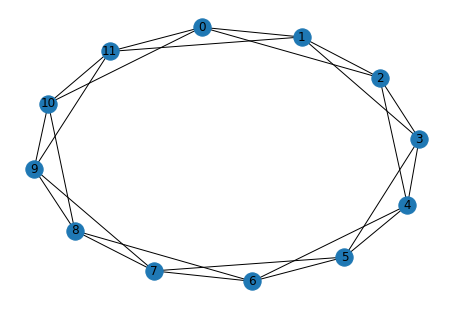

In [75]:
Gr = make_ring_lattice(12, 5)
nx.draw(Gr, with_labels=True)

In [76]:
def flip(p): return np.random.random() < p

def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            # No self-referential and no repeats
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

rewire(Gr, 0.1)

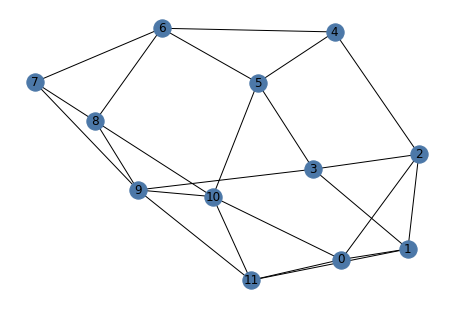

In [77]:
nx.draw(Gr, with_labels=True, node_color=COLORS[0])

In [78]:
nodes = set(Gr)
u = list(Gr.nodes())[1]

choices = nodes - {u} - set(Gr[u])
choices

{4, 5, 6, 7, 8, 9, 10}

In [79]:
nodes = set(Gr)
u = list(Gr.nodes())[8]

choices = nodes - {u} - set(Gr[u])
choices

{0, 1, 2, 3, 4, 5, 11}

In [80]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


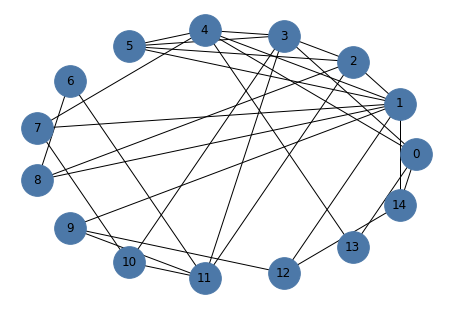

In [84]:
def make_ws_graph(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

ws_lattice = make_ws_graph(15, 4, 0.9)
nx.draw_circular(ws_lattice, node_color=COLORS[0], node_size=1000, with_labels=True)

In [101]:
from itertools import product
from IPython.display import display

def ws_graph_and_draw(ns, ks, ps):
    for n, k, p in product(ns, ks, ps):
        print(f'n = {n}, k = {k}, p = {p}.')
        ws_graph = make_ws_graph(n, k, p)
        (nx.draw(ws_graph, node_color=np.random.choice(COLORS), 
                node_size=200, with_labels=True))

n = 9, k = 2, p = 0.2.


None

n = 9, k = 2, p = 0.3.


None

n = 9, k = 6, p = 0.2.


None

n = 9, k = 6, p = 0.3.


None

n = 15, k = 2, p = 0.2.


None

n = 15, k = 2, p = 0.3.


None

n = 15, k = 6, p = 0.2.


None

n = 15, k = 6, p = 0.3.


None

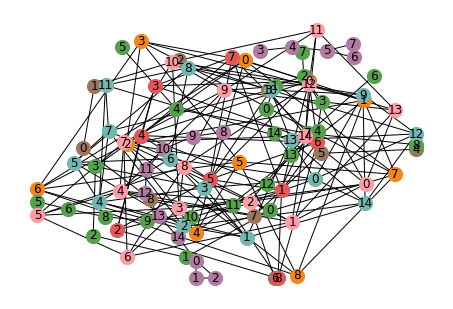

In [100]:
ws_graph_and_draw([9, 15], [2, 6], [0.2, 0.3])